# Introduction

## Introducing the Dataset

This dataset includes data for graduate degrees admission (Masters), originally found on "Kaggle" (https://www.kaggle.com/mohansacharya/graduate-admissions)

The set includes the following Columns : Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit

First read of the dataset's columns we can coclude some few basic facts and assumptions: 
    
    1.Serial No. is just for providing a unique index and is thus ignored in any anaylsis, as it's imporbable that it indicates an order of admission in terms of time or priority.
    
    2.Almost all data are assumed to be collerated to the chance of admission.


       


# First Steps

## Importing Modules and Reading the .csv File

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
data.drop('Serial No.', inplace=True, axis=1)
data.rename({'Chance of Admit ': 'Chance of Admit'}, axis=1, inplace=True)

## Exploring the Data

### In General 

In [4]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


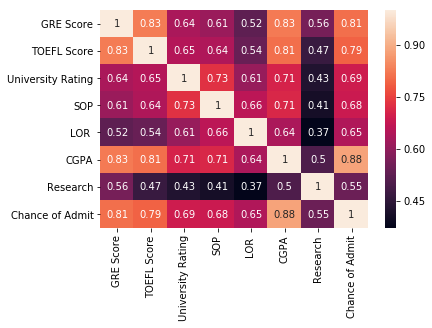

In [7]:
sns.heatmap(data.corr(), annot=True)

In [8]:
X = data['GRE Score']

In [9]:
y = data['Chance of Admit']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

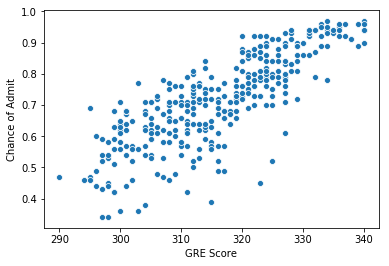

In [14]:
sns.scatterplot(X_train, y_train)

In [15]:
lm.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
predictions = lm.predict(X_test.values.reshape(-1, 1))

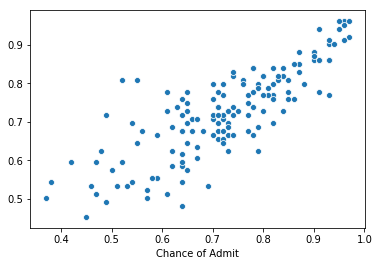

In [17]:
sns.scatterplot(y_test, predictions)

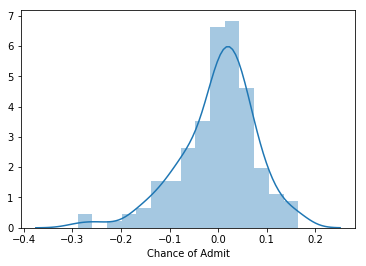

In [18]:
sns.distplot(y_test-predictions)